In [1]:
import FPCAnalysis
import numpy as np

In [2]:
#load everything we need
#-----------------------

path = '/home/crbrown/M06_th45/'
numframe = 2000
inputs = FPCAnalysis.ddhr.read_input(path=path)

#load the fields data
dfields = FPCAnalysis.ddhr.field_loader(path=path,num=numframe)
dfields.keys()

#load the density data
dden = FPCAnalysis.ddhr.den_loader(path=path,num=numframe)
dden.keys()

dt = inputs['dt']

#Let's boost to the correct frame!
all_dfields = FPCAnalysis.ddhr.all_dfield_loader(path=path) #load all fields data to track shock
vshock,_ = FPCAnalysis.ft.shock_from_ex_cross(all_dfields,dt=inputs['dt'])

#transform ALL fields
vshock, xshockvals,x0 = FPCAnalysis.ft.shock_from_ex_cross(all_dfields,dt,returnx0=True)
dfields = FPCAnalysis.ft.lorentz_transform_vx(dfields,vshock)
_fields = []
for k in range(0,len(all_dfields['dfields'])):
    _fields.append(FPCAnalysis.ft.lorentz_transform_vx(all_dfields['dfields'][k],vshock,))
all_dfields['dfields'] = _fields

print('vshock in v/va=Ma is ',vshock)


In [5]:
#We compute the shock velocity using an adhoc shock that attempts to locate the shock by looking at the shope of ex
# This works well for low mach number qperp and perp shocks (although you might need to play around with the optional parameters of shock_from_ex_cross)
# However, this is not expected to work for qpar or par shocks

In [6]:
#Now let's plot the field vals vs time in a 'stack plot'

In [ ]:
#let's select some of the frames to plot
maxidx = 80
skipidx = 1 
startidx = 50
dfieldsdict = {'frame':all_dfields['frame'][startidx:maxidx:skipidx],'dfields':all_dfields['dfields'][startidx:maxidx:skipidx]}
xshockvalsubset = xshockvals[startidx:maxidx:skipidx]

In [20]:
np.max(dfields['ex'])

13.429755

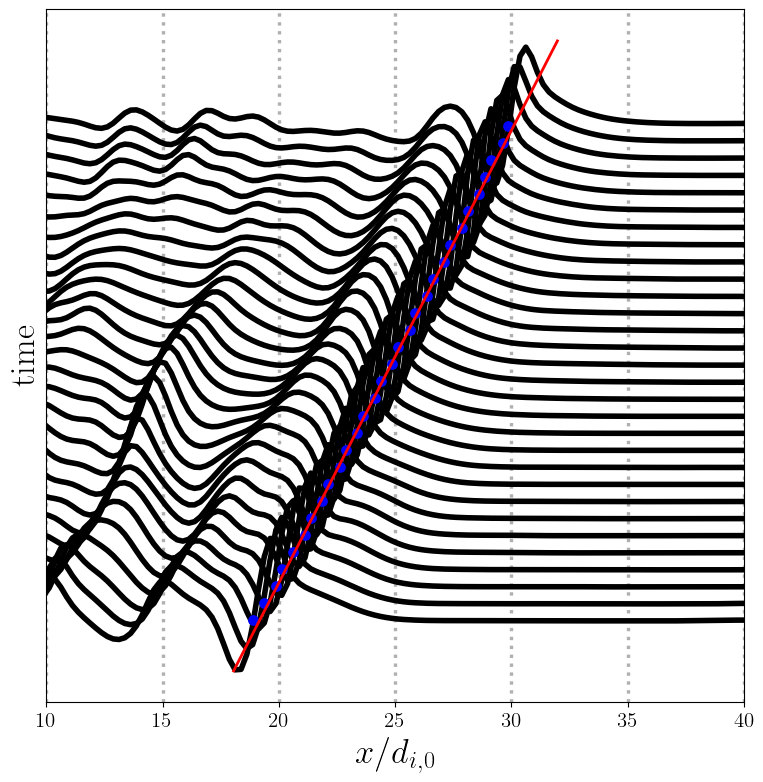

In [19]:
import numpy as np
import matplotlib.pyplot as plt

xxindex = 0
yyindex = 0 
zzindex = 0
fieldkey = 'ex'
axis = '_xx'
offsetval = 2 #this is arbitrary, pick a value that works well (typically something like .1-.2 times max val of plotted val)
flnm = ''
from matplotlib.pyplot import cm
color = cm.rainbow(np.linspace(0, 1, len(dfieldsdict['dfields'])))

#fig, axs = plt.subplots(len(dfieldsdict['frame']), sharex=True, sharey=True)
fig = plt.figure()
fieldcoord = np.asarray(dfieldsdict['dfields'][0][fieldkey+axis])
fig.set_size_inches(9., 9.)

#plot the fields- note we offset by some arbitrary amount
_i = 0
for k in range(0,len(dfieldsdict['dfields'])):
    fieldval = np.asarray([dfieldsdict['dfields'][k][fieldkey][xxindex][yyindex][i] for i in range(0,len(dfieldsdict['dfields'][k][fieldkey+axis]))])+_i*offsetval
    plt.plot(fieldcoord,fieldval,color='black',zorder=2)
    _i += 1

#plot the points we located as the 'shock's location'
_i = 0
for k in range(0,len(dfieldsdict['dfields'])):
    plt.scatter(xshockvalsubset[k],_i*offsetval,color='blue',s=45,zorder=3)
    _i += 1
    
#build line from shock vel data
offsetarray = []
fitxshockval = []
outputcadence = 20
for k in range(-3,len(dfieldsdict['dfields'])+5):
    #use fit
    fitxshockval.append(x0+(k+startidx)*vshock*dt*outputcadence)
    offsetarray.append((k)*offsetval) 
    
plt.plot(fitxshockval,offsetarray,color='red',linewidth=2, zorder=10) 
plt.style.use("cb.mplstyle") #sets style parameters for matplotlib plots
plt.ylabel('time', fontsize=25)
plt.xlabel('$x/d_{i,0}$', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks([])
plt.grid()
plt.xlim(10,40)
if(flnm == ''):
    plt.show()
else:
    fig.tight_layout()
    plt.savefig(flnm+'.png',dpi=300,format='png',transparent=False,facecolor='white')
plt.close()